## **Dataset Exploration**
From the first attempt of running the model with no modifications, there are a lot of improvements that need to be made. To start off, all data will be initialized and merged to assess every feature that is provided. To prevent repetition and confusion in regards to receiving banks and paying banks, several dataframes will be created to prevent mis-alignment of columns. These dataframes will be referred to by originating and ending accounts. In terms of standardization of datasets, all columns will be transformed to their respective data types. Each column and comparative column will be assessed in how well of a determinant feature it may serve in the modeling process.

- *orig_df*: contains banking information from where a transaction starts.
- *end_df*: contains banking information from where a transaction ends.

In [2]:
import pandas as pd

# Initialize
accounts = pd.read_csv('Files_CSV/HI-Small_accounts.csv')
transactions = pd.read_csv('Files_CSV/HI-Small_Trans.csv')

# Column Names Change
transactions.rename(columns={'Account': 'Acc. Orig.', 'Account.1': 'Acc. End'}, inplace=True)

# Change Data Types
col_to_int = ['From Bank', 'To Bank', 'Is Laundering']
col_to_float = ['Amount Received', 'Amount Paid']
transactions[col_to_int] = transactions[col_to_int].astype(int)
transactions[col_to_float] = transactions[col_to_float].astype(float)
transactions['Timestamp'] = pd.to_datetime(transactions['Timestamp'])

# Split Columns
accounts[['Bank Name (2)', 'Bank Name (3)']] = accounts['Bank Name'].str.split('#', n=1, expand=True)
accounts[['Entity Name (2)', 'Entity Name (3)']] = accounts['Entity Name'].str.split('#', n=1, expand=True)

# Merge and Create Originating & Receiving
orig_df = pd.merge(transactions, accounts, left_on='Acc. Orig.', right_on='Account Number', how='left')
orig_df = orig_df.drop(['Timestamp', 'From Bank', 'To Bank', 'Acc. End', 'Receiving Currency', 
                        'Amount Received', 'Account Number', 'Bank Name (3)', 'Entity Name', 'Entity Name (3)'], axis=1)
end_df = pd.merge(transactions, accounts, left_on='Acc. End', right_on='Account Number', how='left')
end_df = end_df.drop(['Timestamp', 'From Bank', 'To Bank', 'Acc. Orig.', 'Payment Currency', 
                      'Amount Paid', 'Account Number', 'Bank Name (3)', 'Entity Name', 'Entity Name (3)'], axis=1)

#### **orig_df** contains banking information from where a transaction starts.

In [3]:
orig_df

,Acc. Orig.,Amount Paid,Payment Currency,Payment Format,Is Laundering,Bank Name,Bank ID,Entity ID,Bank Name (2),Entity Name (2)
0,8000EBD30,3697.340000,US Dollar,Reinvestment,0,National Bank of Laramie,10,800D232D0,National Bank of Laramie,Partnership
1,8000F4580,0.010000,US Dollar,Cheque,0,Sappo Cooperative Bank,3208,8008EEA70,Sappo Cooperative Bank,Partnership
2,8000F4670,14675.570000,US Dollar,Reinvestment,0,National Bank of Fort Wayne,3209,800FBB3A0,National Bank of Fort Wayne,Partnership
3,8000F5030,2806.970000,US Dollar,Reinvestment,0,National Bank of the East,12,800C0EF20,National Bank of the East,Sole Proprietorship
4,8000F5200,36682.970000,US Dollar,Reinvestment,0,National Bank of Laramie,10,800C3EC10,National Bank of Laramie,Partnership
...,...,...,...,...,...,...,...,...,...,...
5078390,8148A6631,0.154978,Bitcoin,Bitcoin,0,Crytpo Bank #28,54219,800FE9980,Crytpo Bank,Country
5078391,8148A8671,0.108128,Bitcoin,Bitcoin,0,Japan Bank #0,15,800FE9980,Japan Bank,Country
5078392,8148A6771,0.004988,Bitcoin,Bitcoin,0,Crytpo Bank #41,154365,8004B5CD0,Crytpo Bank,Partnership
5078393,8148A6311,0.038417,Bitcoin,Bitcoin,0,Crytpo Bank #321,256398,8001C0480,Crytpo Bank,Sole Proprietorship


#### **end_df** contains banking information from where a transaction ends.

In [4]:
end_df

,Acc. End,Amount Received,Receiving Currency,Payment Format,Is Laundering,Bank Name,Bank ID,Entity ID,Bank Name (2),Entity Name (2)
0,8000EBD30,3697.340000,US Dollar,Reinvestment,0,National Bank of Laramie,10,800D232D0,National Bank of Laramie,Partnership
1,8000F5340,0.010000,US Dollar,Cheque,0,Arbor Savings Bank,1,800AA5D20,Arbor Savings Bank,Corporation
2,8000F4670,14675.570000,US Dollar,Reinvestment,0,National Bank of Fort Wayne,3209,800FBB3A0,National Bank of Fort Wayne,Partnership
3,8000F5030,2806.970000,US Dollar,Reinvestment,0,National Bank of the East,12,800C0EF20,National Bank of the East,Sole Proprietorship
4,8000F5200,36682.970000,US Dollar,Reinvestment,0,National Bank of Laramie,10,800C3EC10,National Bank of Laramie,Partnership
...,...,...,...,...,...,...,...,...,...,...
5078353,8148A8711,0.154978,Bitcoin,Bitcoin,0,Crytpo Bank #321,256398,800FE9980,Crytpo Bank,Country
5078354,8148A8711,0.108128,Bitcoin,Bitcoin,0,Crytpo Bank #321,256398,800FE9980,Crytpo Bank,Country
5078355,8148A8711,0.004988,Bitcoin,Bitcoin,0,Crytpo Bank #321,256398,800FE9980,Crytpo Bank,Country
5078356,8148A8711,0.038417,Bitcoin,Bitcoin,0,Crytpo Bank #321,256398,800FE9980,Crytpo Bank,Country


#### **Laundering separation** is where each dataframe is subset by fraudulent and non-fraudulent charges for easy analysis.

In [5]:
orig_isFraud = orig_df[orig_df['Is Laundering'] == 1]
orig_notFraud = orig_df[orig_df['Is Laundering'] == 0]

end_isFraud = end_df[end_df['Is Laundering'] == 1]
end_notFraud = end_df[end_df['Is Laundering'] == 0]

## **Feature Analysis**

For this section of the study, each column will be assessed in its predictive ability. As seen in the *First Attempt.ipynb*, it is evident that the dataset provided needs necessary cleaning to optimize Random Forest modeling. Therefore, feature engineering is crucial, which is best said as "adjusting data attributes to make a model's predictions more accurate" (GeeksforGeeks 2025). For creating a model that detects money laundering, there will need to be individual analysis of each column, determining if such columns are strong enough features that aid it in accuracy and recall. Below, each assessment is discussed and stated if the column will become a feature for the final model.

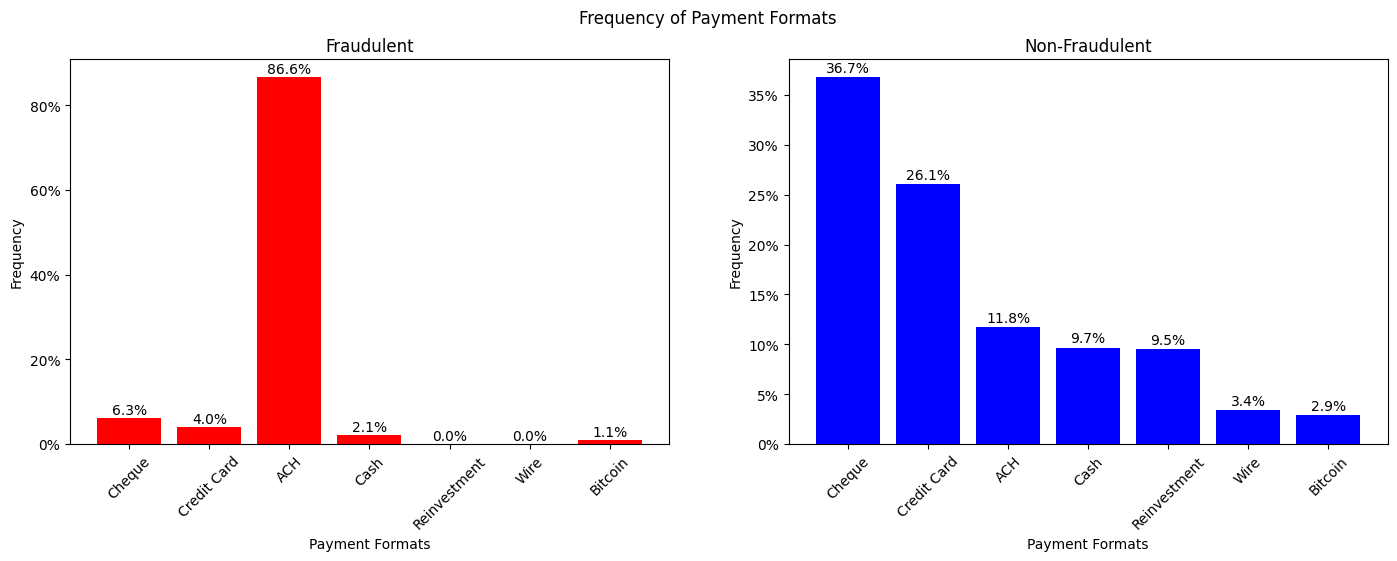

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

bar_isFraud = orig_isFraud['Payment Format'].value_counts(normalize=True)
bar_notFraud = orig_notFraud['Payment Format'].value_counts(normalize=True)

common_index = bar_notFraud.index
bar_isFraud = bar_isFraud.reindex(common_index, fill_value=0)
bar_notFraud = bar_notFraud.reindex(common_index, fill_value=0)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
fig.suptitle('Frequency of Payment Formats')

# --- Fraudulent Transactions ---
bars1 = ax1.bar(bar_isFraud.index, bar_isFraud.values, color='red')
ax1.set_title('Fraudulent')
ax1.set_xlabel('Payment Formats')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=45)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.,
        height + 0.002,
        f'{height:.1%}',
        ha='center', va='bottom'
    )

# --- Non-Fraudulent Transactions ---
bars2 = ax2.bar(bar_notFraud.index, bar_notFraud.values, color='blue')
ax2.set_title('Non-Fraudulent')
ax2.set_xlabel('Payment Formats')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=45)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

for bar in bars2:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2.,
        height + 0.002,
        f'{height:.1%}',
        ha='center', va='bottom'
    )

plt.show()

**Frequency of Payment Formats**: Above is a comparison of payment formats with fraudulent and non-fraudulent charges. In total, there are seven types of payment formats that appear in this dataset; checks, credit card, automated clearing house (ACH), reinvestment, wire, and bitcoin. Due to the nature of the crime, it is unsurprising that about 86.6% of fraudulent transactions are payed in secure and private networks. With these charts, it is clear that payment format is relatively a high predictive feature. For an effective column in Random Forest modeling, a replacement column will be made to lessen the variance of payment methods. This column will be labeled as *Is_ACH*. 

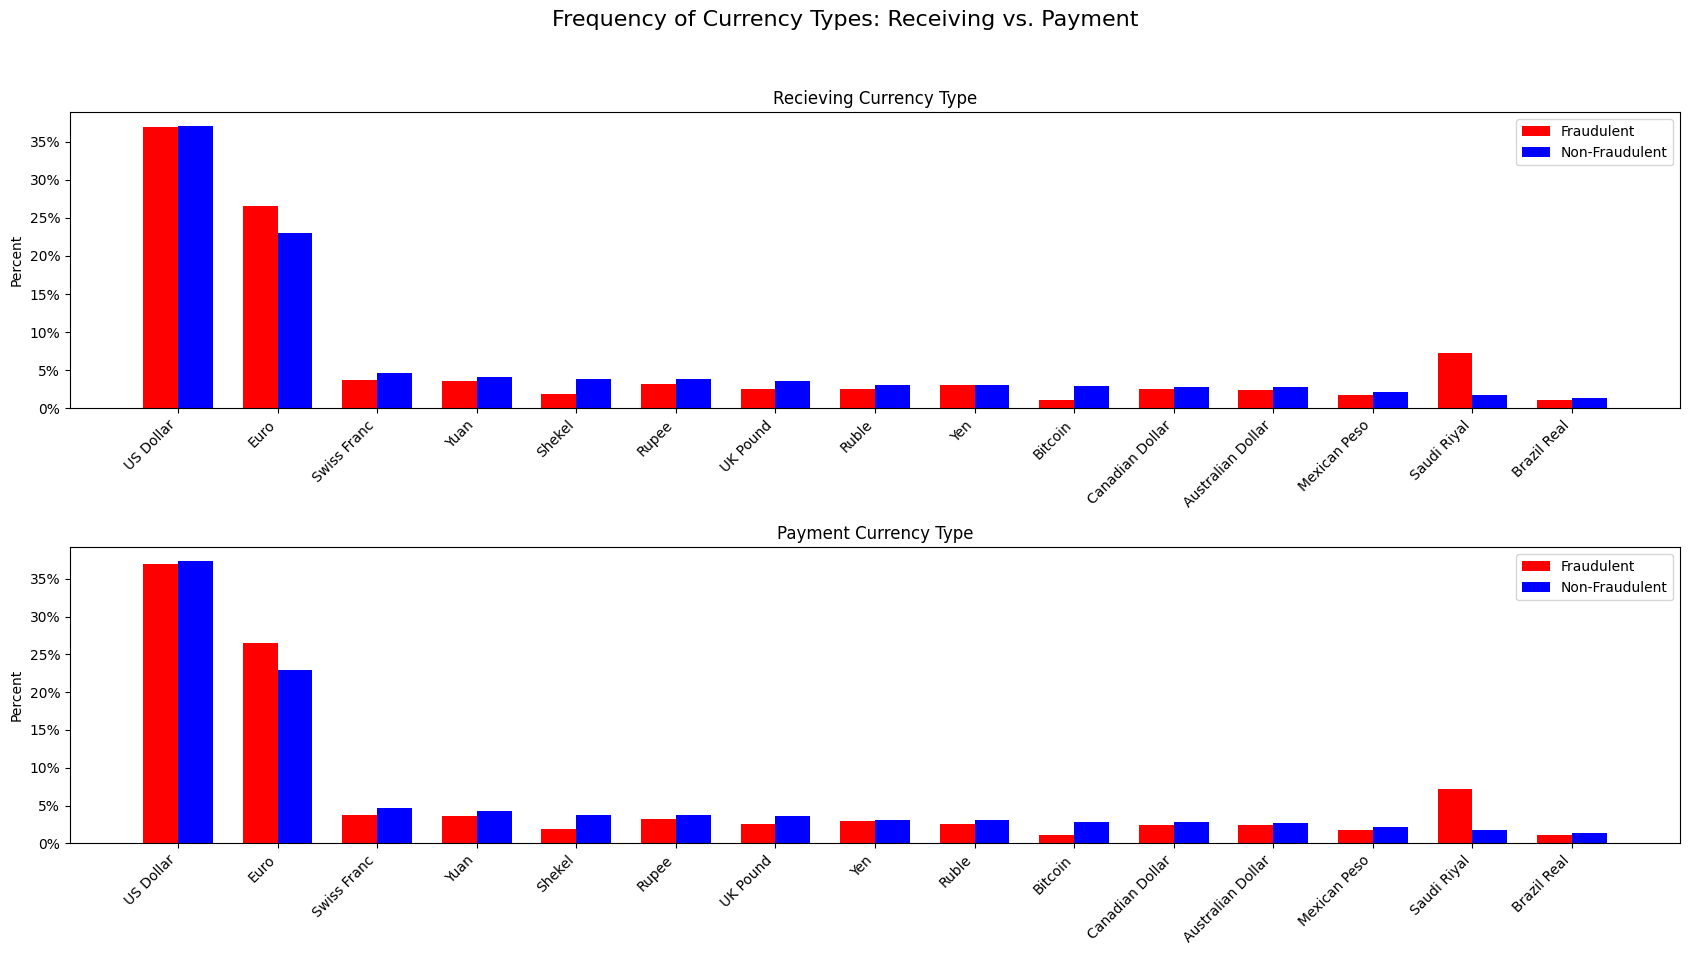

In [7]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 10))
fig.suptitle('Frequency of Currency Types: Receiving vs. Payment', fontsize=16)
width = 0.35

# --- Receiving Currency ---
bar2_isFraud = end_isFraud['Receiving Currency'].value_counts(normalize=True)
bar2_notFraud = end_notFraud['Receiving Currency'].value_counts(normalize=True)
common_index = bar2_notFraud.index
x = np.arange(len(common_index))

ax1.bar(x - width/2, bar2_isFraud.reindex(common_index, fill_value=0).values, width, color='red', label='Fraudulent')
ax1.bar(x + width/2, bar2_notFraud.values, width, color='blue', label='Non-Fraudulent')
ax1.set_title('Recieving Currency Type')
ax1.set_ylabel('Percent')
ax1.set_xticks(x)
ax1.set_xticklabels(common_index, rotation=45, ha='right')
ax1.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# --- Payment Currency (Bottom Chart) ---
bar3_isFraud = orig_isFraud['Payment Currency'].value_counts(normalize=True)
bar3_notFraud = orig_notFraud['Payment Currency'].value_counts(normalize=True)
common_index = bar3_notFraud.index
x = np.arange(len(common_index))

ax2.bar(x - width/2, bar3_isFraud.reindex(common_index, fill_value=0).values, width, color='red', label='Fraudulent')
ax2.bar(x + width/2, bar3_notFraud.values, width, color='blue', label='Non-Fraudulent')
ax2.set_title('Payment Currency Type')
ax2.set_ylabel('Percent')
ax2.set_xticks(x)
ax2.set_xticklabels(common_index, rotation=45, ha='right')
ax2.legend()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Frequency of Payment Types**: From what it appears, there are no strong predictive qualities in fraudulent charges. This includes both receiving and payment currency. That being said, both currency will be dropped from the dataset, ensuring cleaner and more validity in the model.

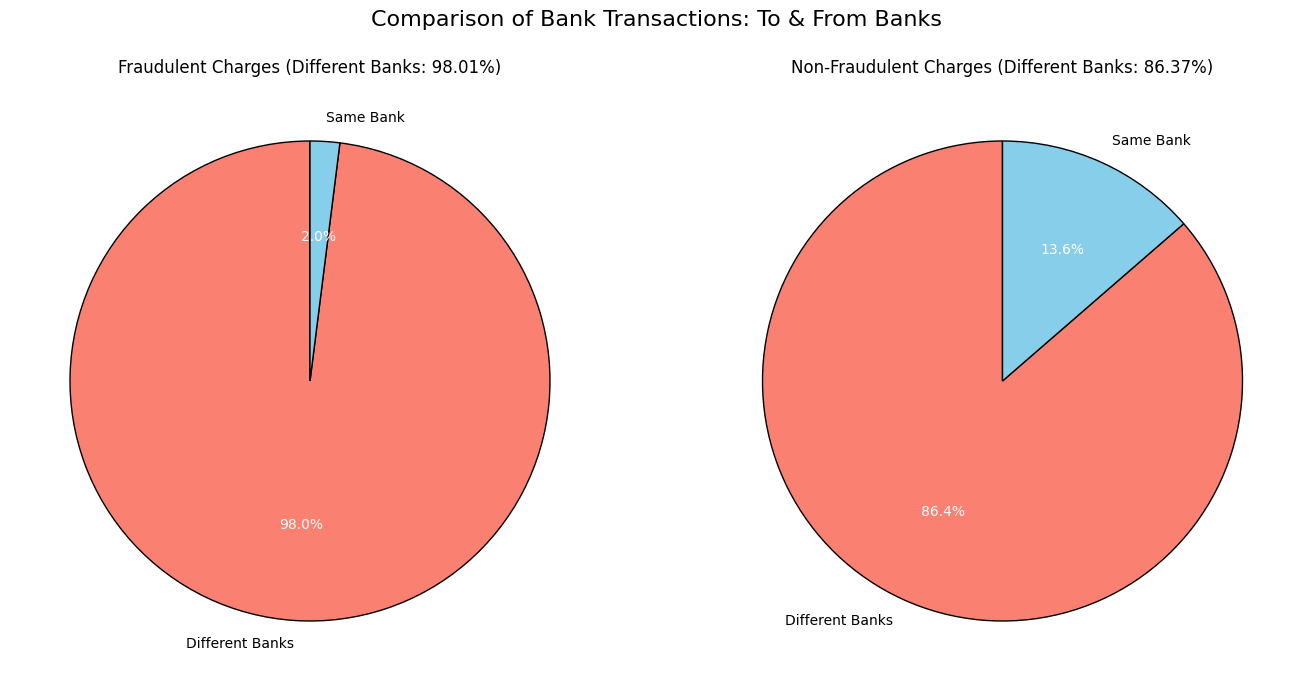

Percent difference: 11.64%


In [59]:
# --- To/From Bank ---
fraud_true = transactions[transactions['Is Laundering'] == 1]
fraud_false = transactions[transactions['Is Laundering'] == 0]

fraud_bank_diff = fraud_true[fraud_true['From Bank'] != fraud_true['To Bank']]
fraud_bank_per = (float(len(fraud_bank_diff)) / float(len(fraud_true))) * 100
notfraud_bank_diff = fraud_false[fraud_false['From Bank'] != fraud_false['To Bank']]
notfraud_bank_per = (float(len(notfraud_bank_diff)) / float(len(fraud_false))) * 100

diff_per = fraud_bank_per - notfraud_bank_per

fraud_same_bank = 100 - fraud_bank_per
notfraud_same_bank = 100 - notfraud_bank_per

# Data for plotting
fraud_data = [fraud_bank_per, fraud_same_bank]
notfraud_data = [notfraud_bank_per, notfraud_same_bank]
labels = ['Different Banks', 'Same Bank']
colors = ['salmon', 'skyblue'] 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

fig.suptitle('Comparison of Bank Transactions: To & From Banks', fontsize=16, color='black')

# --- Fraudulent Transactions ---
wedges1, texts1, autotexts1 = ax1.pie(
    fraud_data, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax1.set_title(f'Fraudulent Charges (Different Banks: {fraud_bank_per:.2f}%)', fontsize=12, color='black')

for autotext in autotexts1:
    autotext.set_color('white') 

# --- Non-Fraudulent Transactions ---
wedges2, texts2, autotexts2 = ax2.pie(
    notfraud_data, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax2.set_title(f'Non-Fraudulent Charges (Different Banks: {notfraud_bank_per:.2f}%)', fontsize=12, color='black')

for autotext in autotexts2:
    autotext.set_color('white')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print(f'Percent difference: {diff_per:.2f}%')

**Comparison of Bank Transactions**: The pie charts display that 98.01% of fraudulent charges utilize different banks for receiving and paying. Unlike non-fraudulent charges, which has a difference of 11.64%. In terms of only fraudulent charges, leveraging different banks to disguise illegal income would make these columns highly predictive. While, the change from non-fraudulent charges are not significantly high enough, it cannot be dismissed as a feature. 

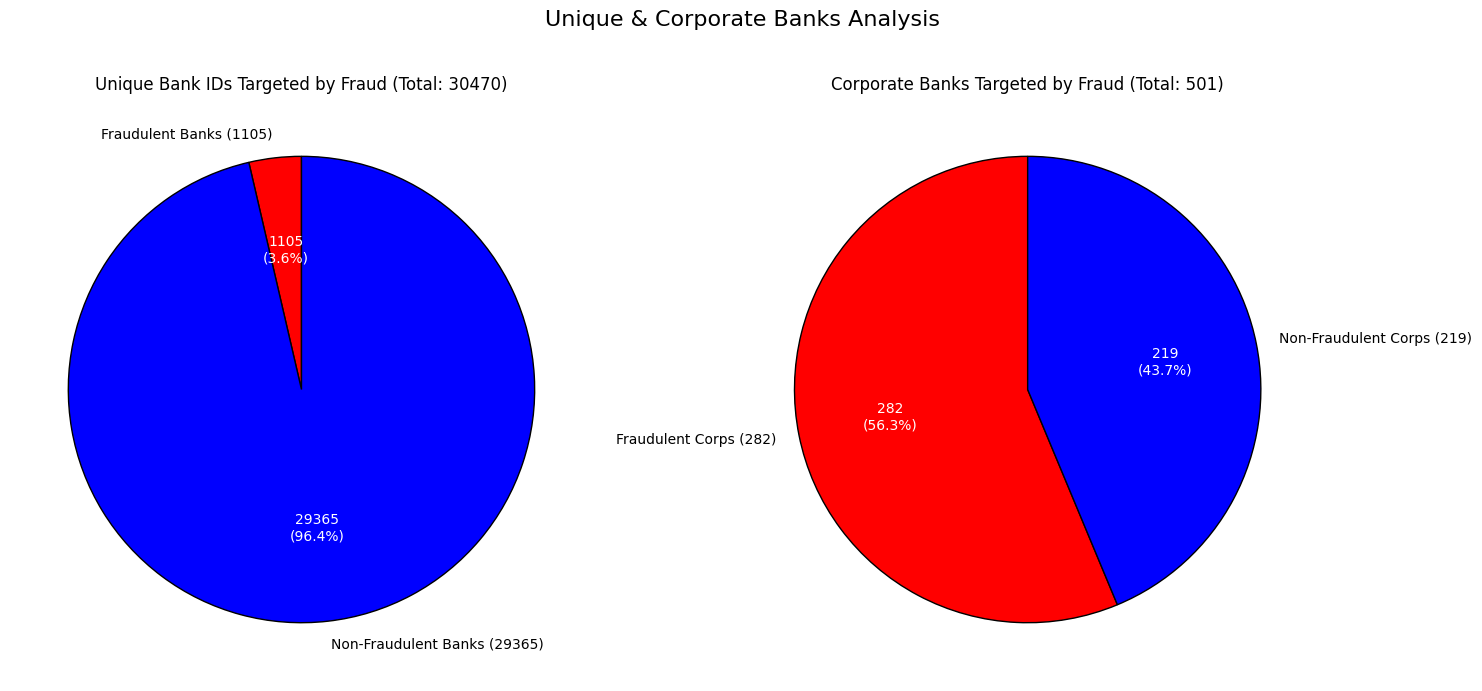

In [10]:
# --- Number of Banks and Corporations ---
colors = ['red', 'blue']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val:d}\n({pct:.1f}%)'
    return my_autopct

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7)) 
fig1.suptitle('Unique & Corporate Banks Analysis', fontsize=16, color='black')

# --- Unique Banks ---
countUnique_allBanks = len(accounts['Bank ID'].drop_duplicates())
countUnique_fraudBanks = len(end_isFraud['Bank ID'].drop_duplicates())
countUnique_notFraudBanks = countUnique_allBanks - countUnique_fraudBanks
unique_sizes = [countUnique_fraudBanks, countUnique_notFraudBanks]
unique_labels = [f'Fraudulent Banks ({countUnique_fraudBanks})', f'Non-Fraudulent Banks ({countUnique_notFraudBanks})']

wedges1, texts1, autotexts1 = ax1.pie(unique_sizes, 
        labels=unique_labels, 
        colors=colors, 
        autopct=make_autopct(unique_sizes), 
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax1.set_title('Unique Bank IDs Targeted by Fraud (Total: {})'.format(countUnique_allBanks), fontsize=12, color='black')
for autotext in autotexts1:
    autotext.set_color('white')

# --- Corporations ---
countCorp_allBanks = len(accounts['Bank Name (2)'].drop_duplicates())
countCorp_fraudBanks = len(end_isFraud['Bank Name (2)'].drop_duplicates())
countCorp_notFraudBanks = countCorp_allBanks - countCorp_fraudBanks
corp_sizes = [countCorp_fraudBanks, countCorp_notFraudBanks]
corp_labels = [f'Fraudulent Corps ({countCorp_fraudBanks})', f'Non-Fraudulent Corps ({countCorp_notFraudBanks})']

wedges2, texts2, autotexts2 = ax2.pie(corp_sizes, 
        labels=corp_labels, 
        colors=colors, 
        autopct=make_autopct(corp_sizes), 
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax2.set_title('Corporate Banks Targeted by Fraud (Total: {})'.format(countCorp_allBanks), fontsize=12, color='black')
for autotext in autotexts2:
    autotext.set_color('white')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Unique & Corporate Banks Analysis**: In this diagram, there are two pie charts displaying the relational count of banks that hold fraudulent charges. On the left, specifically looks at all the unique banks, while on the right displays a broader context of all the corporations. Meaning, if a banking location is a branch of a banking corporation and holds at least one money laundering transaction, then it is counted as part of corporations that are targeted by fraud. In terms of unique banking locations, there is only 3.6% of all banks within the dataset that are actually targeted by fraud. On the other hand, it appears that more corporations of the dataset are targeted by fraud than not. Given that the data pulled by Kaggle is considered a 'simulated world', it is not too far fetched that many banks are utilized for money laundering, as it disguises transactions at a greater depth. Unique banks will be used as a feature of money laundering and called *sus_uniqueBank*. However, further studying of corporations will be studied below.

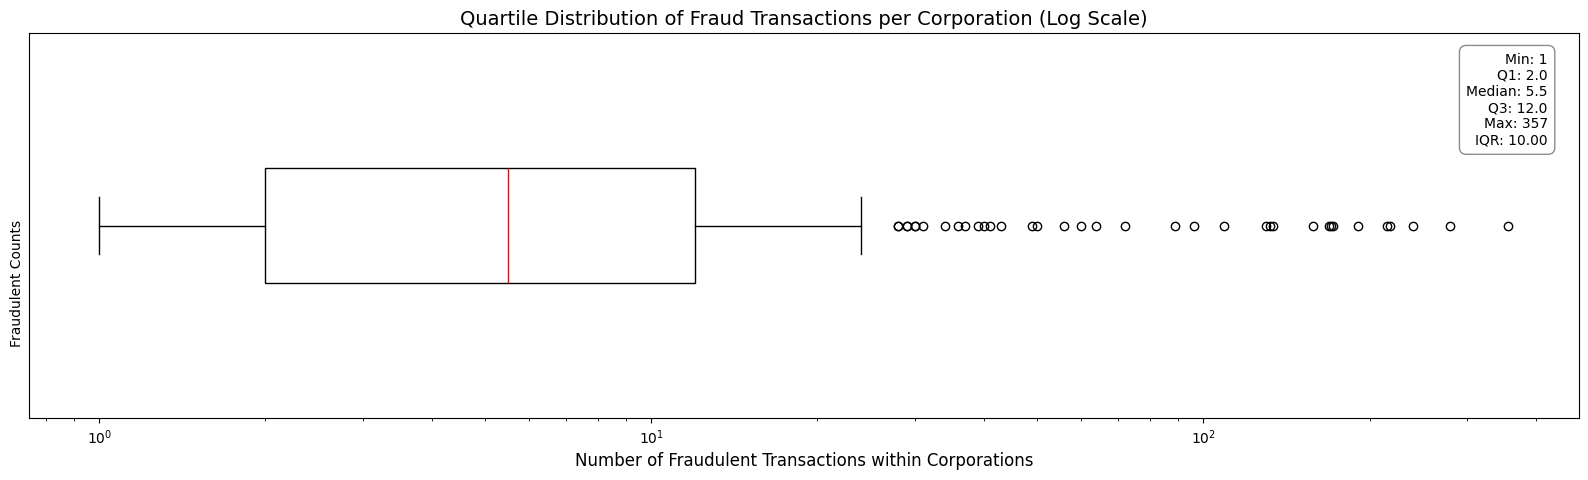

In [ ]:
# --- Corporation Distribution ---
fraudCorps_series = end_isFraud.groupby('Bank Name (2)')['Bank Name (2)'].value_counts().sort_values(ascending=False)
fraudCorps_values = fraudCorps_series.values

data = fraudCorps_values 
q1 = np.percentile(data, 25)
median = np.percentile(data, 50)
q3 = np.percentile(data, 75)
minimum = data.min()
maximum = data.max()
iqr = q3 - q1

stats_text = (
    f"Min: {minimum}\n"
    f"Q1: {q1}\n"
    f"Median: {median}\n"
    f"Q3: {q3}\n"
    f"Max: {maximum}\n"
    f"IQR: {iqr:.2f}"
)

fig2, ax3 = plt.subplots(figsize=(20, 5)) 
ax3.boxplot(fraudCorps_values, vert=False, patch_artist=True, 
            widths=0.3,
            boxprops=dict(facecolor='none', color='black'),
            medianprops=dict(color='red'))

ax3.set_xscale('log')
ax3.set_title('Quartile Distribution of Fraud Transactions per Corporation (Log Scale)', fontsize=14, color='black')
ax3.set_xlabel('Number of Fraudulent Transactions within Corporations', fontsize=12, color='black')
ax3.tick_params(axis='y', length=0) 
ax3.set_yticklabels(['Fraudulent Counts'], rotation=90) 

x_position = 0.98
y_position = 0.95

ax3.text(
    x_position, 
    y_position,
    stats_text,
    transform=ax3.transAxes,
    fontsize=10,
    color='black',
    verticalalignment='top',
    horizontalalignment='right', # Anchor text to the right for alignment
    bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()

**Quartile Distribution**: Analyzing further into corporations, above is a distribution chart of how many money laundering transactions appear in every corporation. Since the distribution ranges from 1 to 357 total attempts and with a significant number of outliers, this shows that with the right coding can be a well informative feature. The coding will be weighted based on median and third quartile. *X* represents fraudulent transactions.
- 0: corporations that have no fraud transactions
- 1: corporations that have 0 < x <= 5
- 2: corporations that have 5 < x <= 12
- 3: corporations that have x > 12

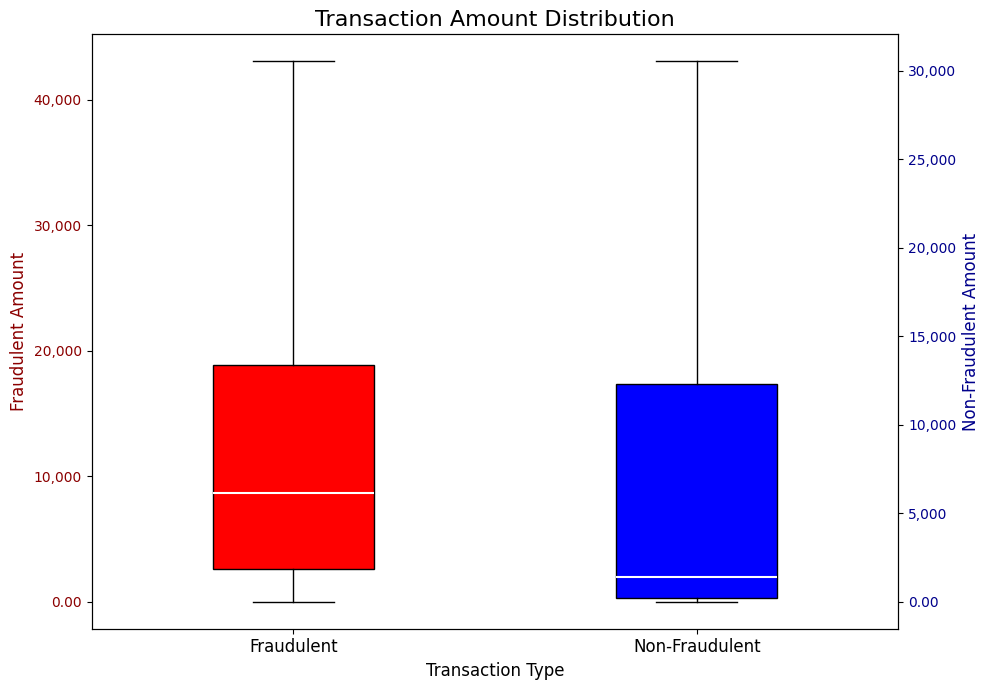

In [38]:
import matplotlib.ticker as ticker

# --- Amount of Money ---
amount_isFraud = end_isFraud['Amount Received']
amount_notFraud = end_notFraud['Amount Received']
boxplot_data = [amount_isFraud, amount_notFraud]
labels = ['Fraudulent', 'Non-Fraudulent']

def formatter(y, p):
    if y >= 1:
        return format(int(y), ',')
    else:
        return f'{y:,.2f}'

money_formatter = ticker.FuncFormatter(formatter)
fig, ax = plt.subplots(figsize=(10, 7))

# Fraud
bp1 = ax.boxplot(
    amount_isFraud, 
    positions=[1], 
    vert=True,
    patch_artist=True,
    widths=0.4,
    showfliers=False,
    medianprops=dict(color='white', linewidth=1.5))
ax.set_title('Transaction Amount Distribution', fontsize=16)
ax.set_ylabel('Fraudulent Amount', fontsize=12, color='darkred')
ax.tick_params(axis='y', labelcolor='darkred')
ax.yaxis.set_major_formatter(money_formatter)
bp1['boxes'][0].set_facecolor('red')
bp1['boxes'][0].set_edgecolor('black')

# Non-Fraud
ax2 = ax.twinx()
bp2 = ax2.boxplot(
    amount_notFraud, 
    positions=[2], 
    vert=True,
    patch_artist=True,
    widths=0.4,
    showfliers=False,
    medianprops=dict(color='white', linewidth=1.5))

ax2.set_ylabel('Non-Fraudulent Amount', fontsize=12, color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
ax2.yaxis.set_major_formatter(money_formatter)
bp2['boxes'][0].set_facecolor('blue')
bp2['boxes'][0].set_edgecolor('black')

ax.set_xticks([1, 2])
ax.set_xticklabels(labels, fontsize=12)
ax.set_xlabel('Transaction Type', fontsize=12)
ax.tick_params(axis='x', rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray') 
ax2.grid(False) 

plt.tight_layout()
plt.show()

**Transaction Amount**: Here is the distribution of fraudulent and non-fraudulent transactions. This is dis-includent of outliers, due to there being many extremes that are reflective of real world payment. From this chart, it can be seen that there is no significant amount of differences making the amount type excludable from the final model.

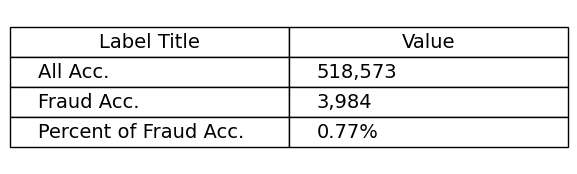

In [ ]:
# --- Accounts Analysis ---
count_allAcc = len(accounts['Account Number'].drop_duplicates())
formatted_allAcc = f"{count_allAcc:,d}"
count_isFraudAcc = len(end_isFraud['Acc. End'].drop_duplicates())
formatted_isFraudAcc = f"{count_isFraudAcc:,d}"
percent_isFraudAcc = (count_isFraudAcc / count_allAcc) * 100
formatted_percent = f'{percent_isFraudAcc:.2f}%'

plt.figure(figsize=(6, 2))
plt.gca()
plt.axis('off')

data = [
    ["All Acc.", formatted_allAcc],
    ["Fraud Acc.", formatted_isFraudAcc],
    ["Percent of Fraud Acc.", formatted_percent]
]
table = plt.table(
    cellText=data,
    loc='center',
    cellLoc='left',
    colLabels=["Label Title", "Value"]
)

table.set_fontsize(14)
table.scale(1.2, 1.8)

plt.show()

**Fraudulent Accounts**: When looking at individual accounts, this assessment will be only on accounts that are receiving money. This is due to the nature of the crime and the fact that it is dependent on where the money ends. From the results gathered, less than 1% of all accounts are used to assist in money laundering. This signifies that this column has a high predictive feature because only a minimal amount of accounts are utilized.

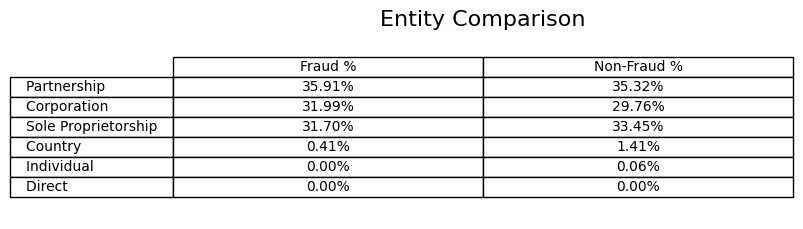

In [ ]:
# --- Entity Analysis ---
entity_true = end_isFraud['Entity Name (2)'].value_counts(normalize=True)
entity_false = end_notFraud['Entity Name (2)'].value_counts(normalize=True)

df_compare = pd.concat([entity_true, entity_false], axis=1)
df_compare.columns = ['Fraud %', 'Non-Fraud %']
df_compare = df_compare.fillna(0)
df_compare['Fraud %'] = (df_compare['Fraud %'] * 100).map('{:.2f}%'.format)
df_compare['Non-Fraud %'] = (df_compare['Non-Fraud %'] * 100).map('{:.2f}%'.format)
df_compare = df_compare.sort_values(by='Fraud %', ascending=False)

fig, ax = plt.subplots(figsize=(8, len(df_compare) * 0.4)) 
ax.axis('off')

cell_text = df_compare.values.tolist()
col_labels = df_compare.columns.tolist()
row_labels = df_compare.index.tolist()

table = ax.table(
    cellText=cell_text,
    rowLabels=row_labels,
    colLabels=col_labels,
    loc='center',
    cellLoc='center'
)

ax.set_title('Entity Comparison', fontsize=16)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2) 

plt.show()

**Entity Comparison**: The last column to analyze is the entities. From the creators of this dataset, there is no specification of what it represents, but from assumptions, it represents transaction reasoning. The comparison incorporates the percentages of transactions from fraudulent and non-fraudulent dataset. Since the datasets do not differ internally or comparatively, this column will not be used for the model.